# 🚢 Titanic Survival Prediction

### 👤 Created by: **Piyush Ramteke**

---

## 📌 Project Introduction

The **RMS Titanic** was a British passenger liner that sank in the North Atlantic Ocean on **April 15, 1912**, after striking an iceberg during her maiden voyage from **Southampton, UK** to **New York City, USA**. The sinking resulted in the deaths of more than **1,500** of the estimated **2,224** passengers and crew aboard, making it one of the deadliest peacetime maritime disasters in history.

The disaster led to major improvements in maritime regulations, including requirements for sufficient lifeboats, lifeboat drills, and the establishment of the **International Ice Patrol** to monitor icebergs in the North Atlantic.

## 🎯 Project Objective

The goal of this project is to build a **Machine Learning model** that predicts whether a passenger on the Titanic **survived or not** based on features such as:

| Feature | Description |
|---------|-------------|
| **PassengerId** | Unique identifier for each passenger |
| **Survived** | Survival status (0 = No, 1 = Yes) — *Target Variable* |
| **Pclass** | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| **Name** | Passenger's full name |
| **Sex** | Gender (male / female) |
| **Age** | Age in years |
| **SibSp** | Number of siblings/spouses aboard |
| **Parch** | Number of parents/children aboard |
| **Ticket** | Ticket number |
| **Fare** | Passenger fare |
| **Cabin** | Cabin number |
| **Embarked** | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

## 🔬 Approach

We will follow a structured Machine Learning pipeline:

1. **Data Loading & Exploration** — Understand the dataset structure, distributions, and missing values
2. **Exploratory Data Analysis (EDA)** — Visualize relationships between features and survival
3. **Data Preprocessing & Feature Engineering** — Handle missing values, encode categories, create new features
4. **Model Building** — Train multiple classification models (Logistic Regression, Decision Tree, Random Forest, SVM, KNN)
5. **Model Evaluation** — Compare model performances and select the best one
6. **Conclusion** — Summarize findings and recommendations

---

## 1️⃣ Import Libraries & Load Dataset

In [1]:
# ============================================================
# Import Libraries
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


In [2]:
# ============================================================
# Load the Dataset
# ============================================================
df = pd.read_csv('Titanic-Dataset.csv')

print(f'Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print('=' * 50)
df.head(10)

Dataset Shape: 891 rows × 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# ============================================================
# Dataset Info & Statistics
# ============================================================
print('📊 Dataset Information:')
print('=' * 50)
df.info()
print('\n')
print('📈 Statistical Summary:')
print('=' * 50)
df.describe()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


📈 Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# ============================================================
# Missing Values Analysis
# ============================================================
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print('🔍 Missing Values:')
print('=' * 50)
missing_df

🔍 Missing Values:


,Missing Count,Percentage (%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


### 📝 Key Observations from Data Loading:

- The dataset contains **891 passengers** with **12 features**
- **Cabin** has the most missing values (~77%) — we will drop this column
- **Age** has ~20% missing values — we will fill with the median
- **Embarked** has only 2 missing values — we will fill with the mode
- The target variable **Survived** is binary (0 = died, 1 = survived)

---

## 2️⃣ Exploratory Data Analysis (EDA)

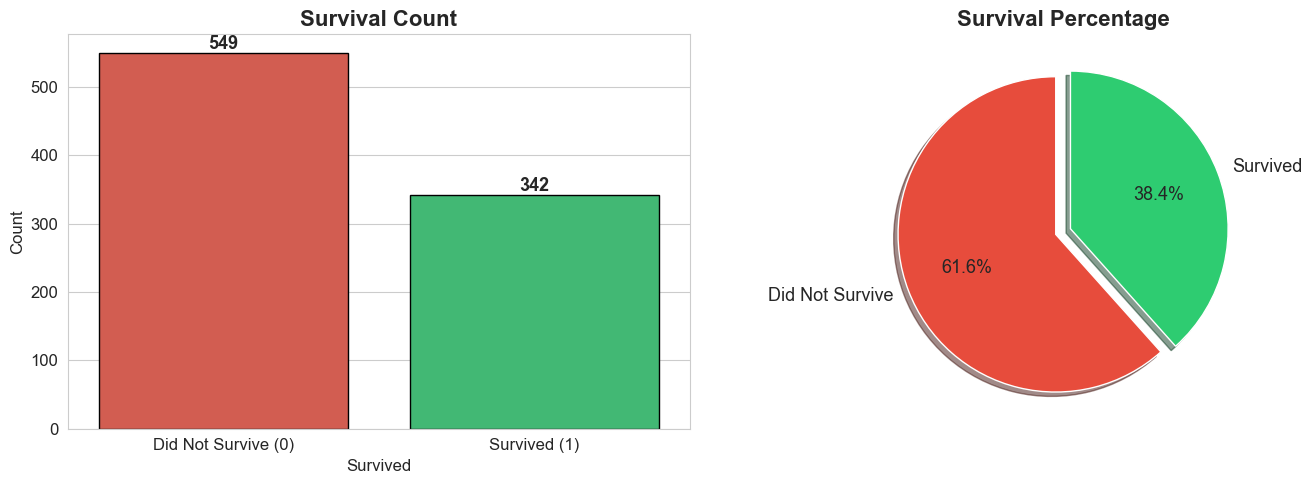


🔹 Survived: 342 (38.4%)
🔹 Did Not Survive: 549 (61.6%)


In [5]:
# ============================================================
# 2.1 — Survival Distribution
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
colors = ['#e74c3c', '#2ecc71']
sns.countplot(x='Survived', data=df, palette=colors, ax=axes[0], edgecolor='black')
axes[0].set_title('Survival Count', fontsize=16, fontweight='bold')
axes[0].set_xticklabels(['Did Not Survive (0)', 'Survived (1)'])
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=13, fontweight='bold')

# Pie chart
survived_counts = df['Survived'].value_counts()
axes[1].pie(survived_counts, labels=['Did Not Survive', 'Survived'], 
            autopct='%1.1f%%', colors=colors, startangle=90, 
            explode=(0.05, 0.05), shadow=True, textprops={'fontsize': 13})
axes[1].set_title('Survival Percentage', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f'\n🔹 Survived: {survived_counts[1]} ({survived_counts[1]/len(df)*100:.1f}%)')
print(f'🔹 Did Not Survive: {survived_counts[0]} ({survived_counts[0]/len(df)*100:.1f}%)')

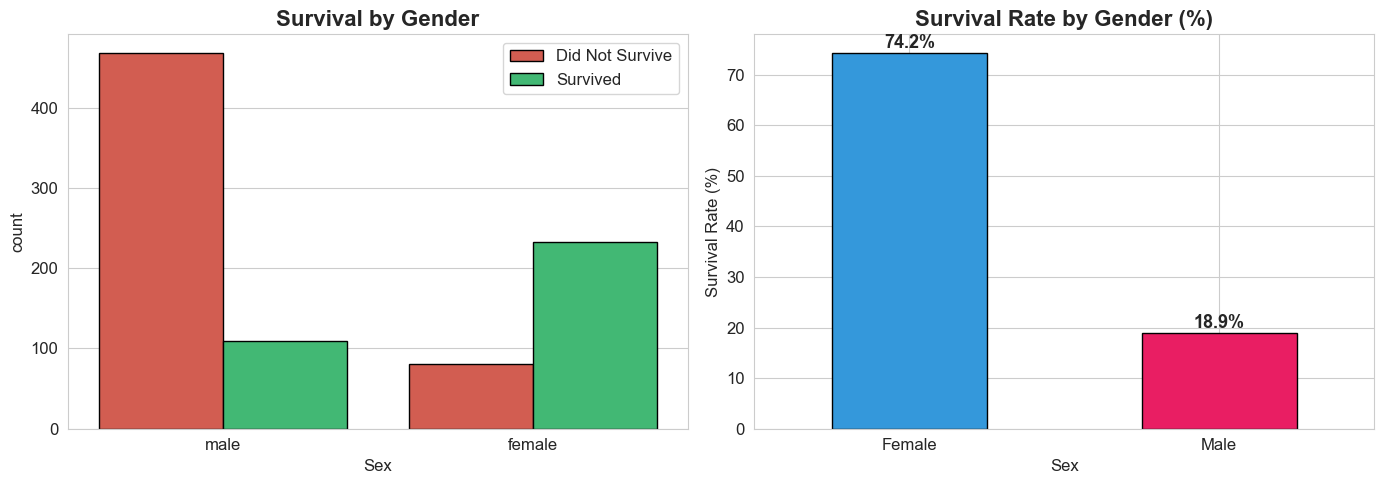


💡 Insight: Females had a significantly higher survival rate (~74%) compared to males (~19%).
   This aligns with the "women and children first" evacuation policy.


In [6]:
# ============================================================
# 2.2 — Survival by Gender
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Sex', hue='Survived', data=df, palette=colors, ax=axes[0], edgecolor='black')
axes[0].set_title('Survival by Gender', fontsize=16, fontweight='bold')
axes[0].legend(['Did Not Survive', 'Survived'], loc='upper right')

# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
gender_survival.plot(kind='bar', color=['#3498db', '#e91e63'], ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Rate by Gender (%)', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)

for i, v in enumerate(gender_survival):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print('\n💡 Insight: Females had a significantly higher survival rate (~74%) compared to males (~19%).')
print('   This aligns with the "women and children first" evacuation policy.')

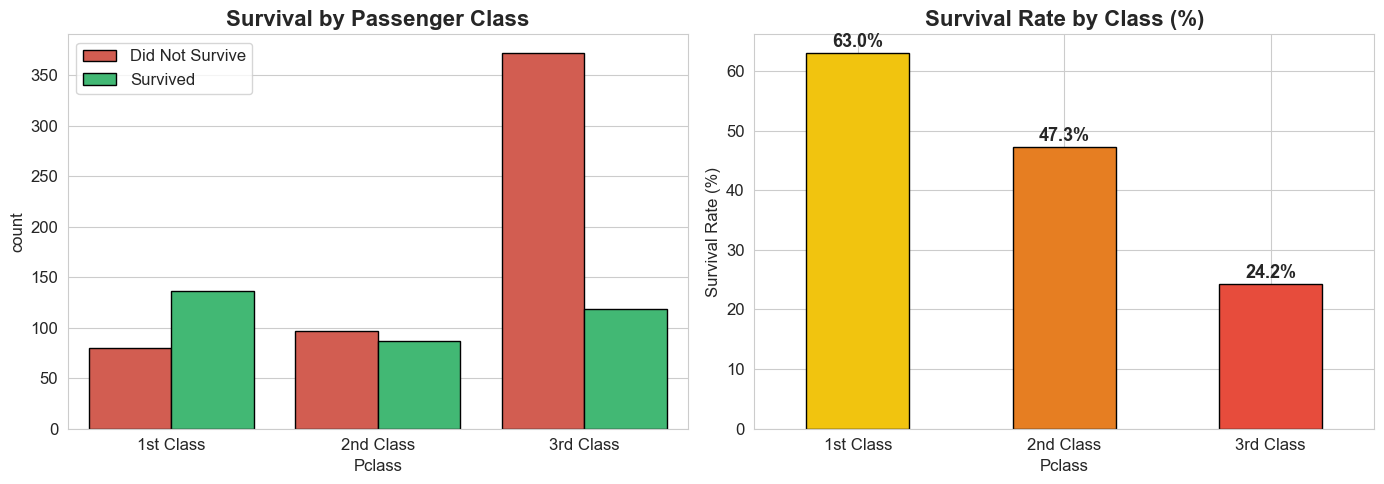


💡 Insight: 1st class passengers had the highest survival rate (~63%), while 3rd class had the lowest (~24%).
   Socioeconomic status clearly influenced survival chances.


In [7]:
# ============================================================
# 2.3 — Survival by Passenger Class
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Pclass', hue='Survived', data=df, palette=colors, ax=axes[0], edgecolor='black')
axes[0].set_title('Survival by Passenger Class', fontsize=16, fontweight='bold')
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

# Survival rate by class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival.plot(kind='bar', color=['#f1c40f', '#e67e22', '#e74c3c'], ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Rate by Class (%)', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

for i, v in enumerate(class_survival):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print('\n💡 Insight: 1st class passengers had the highest survival rate (~63%), while 3rd class had the lowest (~24%).')
print('   Socioeconomic status clearly influenced survival chances.')

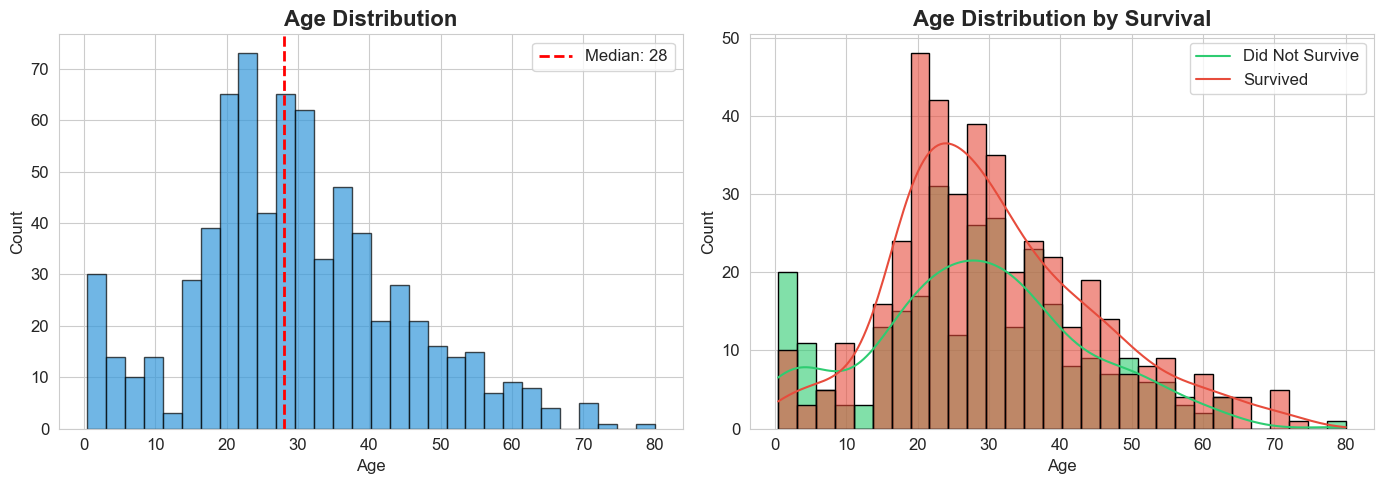


💡 Insight: Children (Age < 10) had a better chance of survival.
   Elderly passengers (Age > 60) had lower survival rates.


In [8]:
# ============================================================
# 2.4 — Age Distribution & Survival
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
df['Age'].dropna().hist(bins=30, ax=axes[0], color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].axvline(df['Age'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.0f}')
axes[0].legend(fontsize=12)

# Age vs Survival
sns.histplot(data=df.dropna(subset=['Age']), x='Age', hue='Survived', kde=True, bins=30, 
             palette=colors, ax=axes[1], edgecolor='black', alpha=0.6)
axes[1].set_title('Age Distribution by Survival', fontsize=16, fontweight='bold')
axes[1].legend(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()

print('\n💡 Insight: Children (Age < 10) had a better chance of survival.')
print('   Elderly passengers (Age > 60) had lower survival rates.')

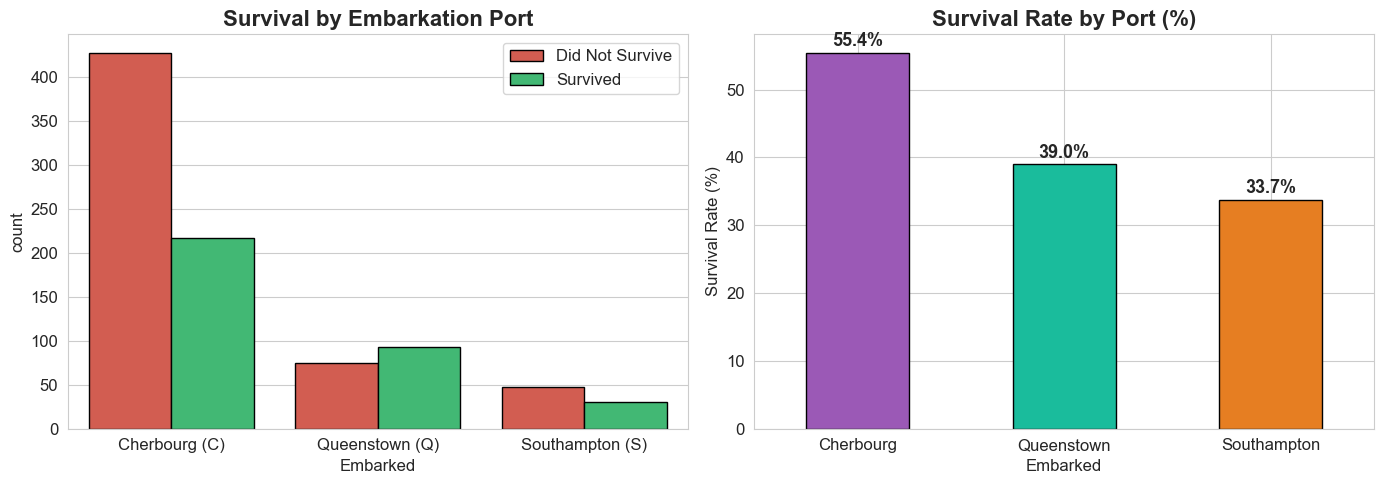


💡 Insight: Passengers who embarked from Cherbourg had the highest survival rate (~55%).
   This is likely because more 1st class passengers boarded from Cherbourg.


In [9]:
# ============================================================
# 2.5 — Survival by Embarked Port
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Embarked', hue='Survived', data=df, palette=colors, ax=axes[0], edgecolor='black')
axes[0].set_title('Survival by Embarkation Port', fontsize=16, fontweight='bold')
axes[0].legend(['Did Not Survive', 'Survived'])
axes[0].set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])

# Survival rate by embarkation
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100
embarked_survival.plot(kind='bar', color=['#9b59b6', '#1abc9c', '#e67e22'], ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Rate by Port (%)', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)

for i, v in enumerate(embarked_survival):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print('\n💡 Insight: Passengers who embarked from Cherbourg had the highest survival rate (~55%).')
print('   This is likely because more 1st class passengers boarded from Cherbourg.')

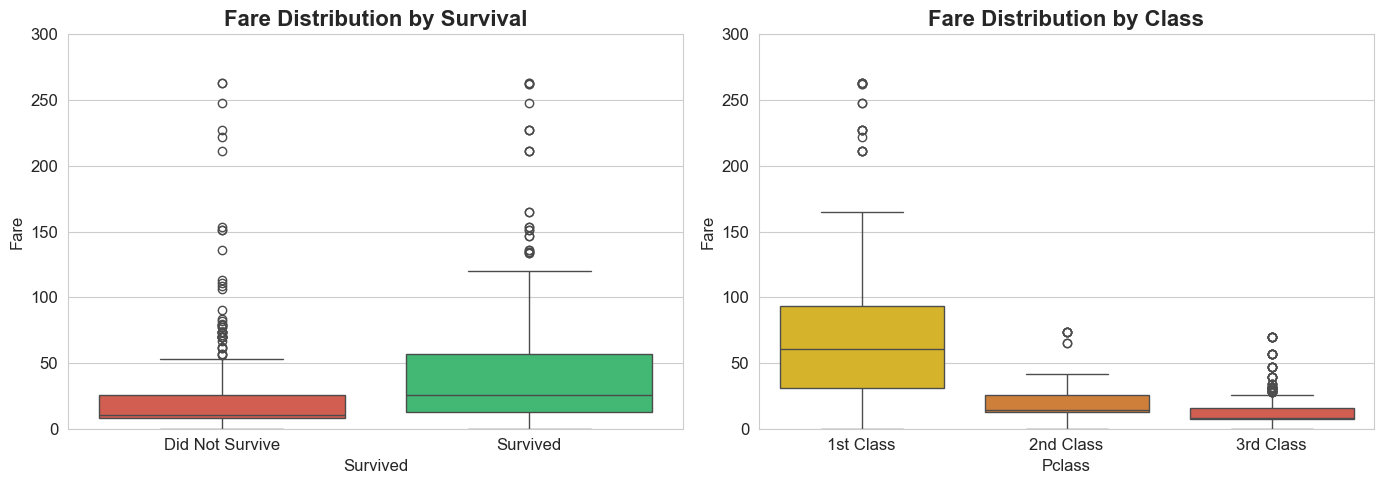


💡 Insight: Survivors tended to have paid higher fares, correlating with higher-class tickets.


In [10]:
# ============================================================
# 2.6 — Fare Distribution & Survival
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='Survived', y='Fare', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Fare Distribution by Survival', fontsize=16, fontweight='bold')
axes[0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0].set_ylim(0, 300)

sns.boxplot(x='Pclass', y='Fare', data=df, palette=['#f1c40f', '#e67e22', '#e74c3c'], ax=axes[1])
axes[1].set_title('Fare Distribution by Class', fontsize=16, fontweight='bold')
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axes[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()

print('\n💡 Insight: Survivors tended to have paid higher fares, correlating with higher-class tickets.')

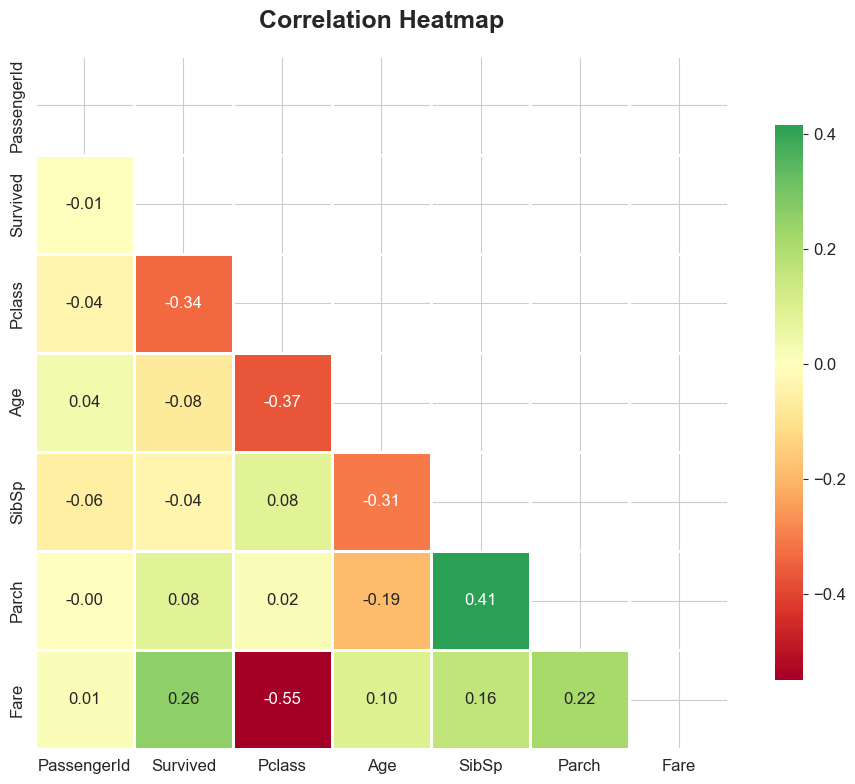


💡 Key Correlations with Survival:
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481


In [11]:
# ============================================================
# 2.7 — Correlation Heatmap
# ============================================================
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, linewidths=1, linecolor='white', square=True,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\n💡 Key Correlations with Survival:')
print(corr_matrix['Survived'].drop('Survived').sort_values(ascending=False).to_string())

### 📝 EDA Summary:

| Finding | Insight |
|---------|--------|
| **Gender** | Females had ~74% survival rate vs ~19% for males |
| **Class** | 1st class: ~63%, 2nd: ~47%, 3rd: ~24% survival rate |
| **Age** | Children had better survival chances |
| **Fare** | Higher fare → higher survival (linked to class) |
| **Embarked** | Cherbourg passengers had highest survival rate |
| **Pclass** | Strongest negative correlation with survival |
| **Fare** | Positive correlation with survival |

---

## 3️⃣ Data Preprocessing & Feature Engineering

In [12]:
# ============================================================
# 3.1 — Handle Missing Values
# ============================================================
print('Missing values BEFORE handling:')
print(df.isnull().sum()[df.isnull().sum() > 0])
print('=' * 50)

# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values — 77%)
df.drop('Cabin', axis=1, inplace=True)

print('\nMissing values AFTER handling:')
print(df.isnull().sum().sum(), '→ No missing values remaining! ✅')

Missing values BEFORE handling:
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing values AFTER handling:
0 → No missing values remaining! ✅


In [13]:
# ============================================================
# 3.2 — Feature Engineering
# ============================================================

# --- Extract Title from Name ---
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss','Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df['Title'] = df['Title'].map(title_mapping).fillna('Rare')

print('📌 Title Distribution:')
print(df['Title'].value_counts())
print()

# --- Family Size ---
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# --- Is Alone ---
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

print('📌 Family Size Distribution:')
print(df['FamilySize'].value_counts().sort_index())
print(f'\n🔹 Travelling Alone: {df["IsAlone"].sum()} passengers ({df["IsAlone"].mean()*100:.1f}%)')

📌 Title Distribution:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

📌 Family Size Distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

🔹 Travelling Alone: 537 passengers (60.3%)


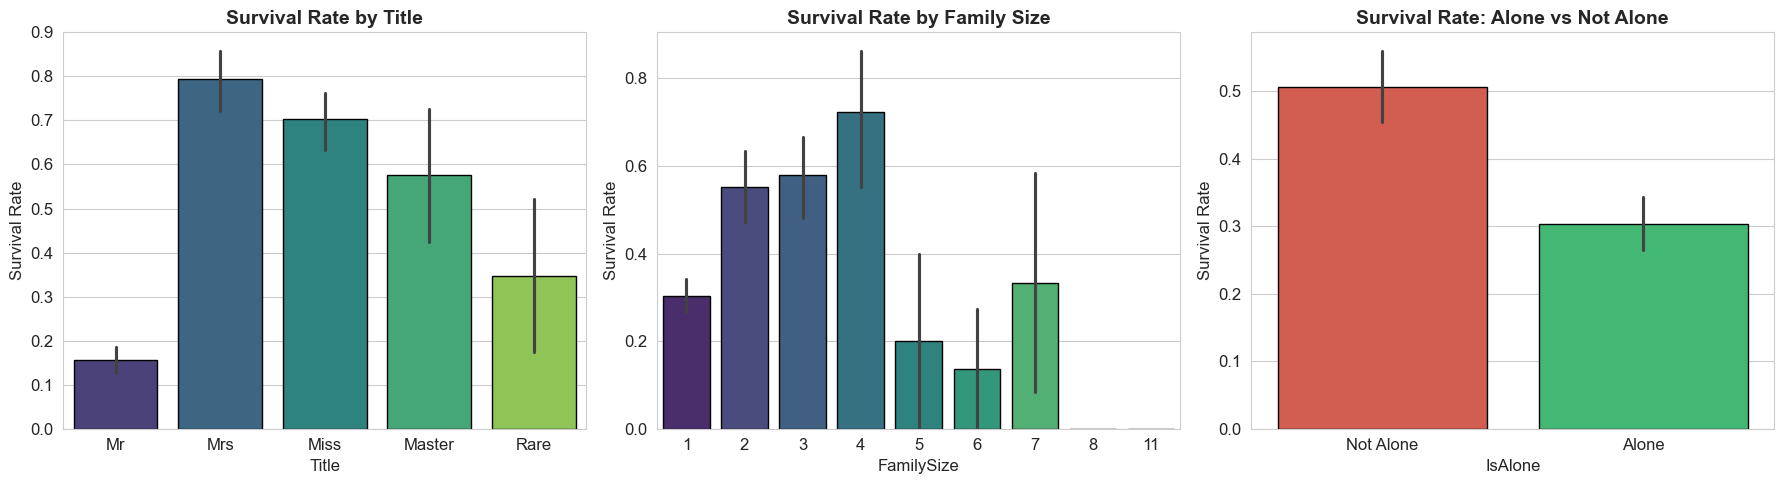


💡 Insight: Mrs & Miss titles have higher survival rates (women).
   Passengers with family sizes 2–4 had better survival chances.
   Travelling alone reduced the chance of survival.


In [14]:
# ============================================================
# 3.3 — Visualize New Features
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Title vs Survival
sns.barplot(x='Title', y='Survived', data=df, palette='viridis', ax=axes[0], edgecolor='black')
axes[0].set_title('Survival Rate by Title', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Rate')

# Family Size vs Survival
sns.barplot(x='FamilySize', y='Survived', data=df, palette='viridis', ax=axes[1], edgecolor='black')
axes[1].set_title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate')

# IsAlone vs Survival  
sns.barplot(x='IsAlone', y='Survived', data=df, palette=colors, ax=axes[2], edgecolor='black')
axes[2].set_title('Survival Rate: Alone vs Not Alone', fontsize=14, fontweight='bold')
axes[2].set_xticklabels(['Not Alone', 'Alone'])
axes[2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

print('\n💡 Insight: Mrs & Miss titles have higher survival rates (women).')
print('   Passengers with family sizes 2–4 had better survival chances.')
print('   Travelling alone reduced the chance of survival.')

In [15]:
# ============================================================
# 3.4 — Encode Categorical Features & Prepare Final Dataset
# ============================================================

# Drop columns not useful for modeling
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])            # female=0, male=1
df['Embarked'] = le.fit_transform(df['Embarked'])   # C=0, Q=1, S=2
df['Title'] = le.fit_transform(df['Title'])          # Encode titles

print('📌 Final Preprocessed Dataset:')
print(f'Shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
print()
df.head(10)

📌 Final Preprocessed Dataset:
Shape: (891, 11)
Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,3,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,1,1
3,1,1,0,35.0,1,0,53.1000,2,3,2,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1
5,0,3,1,28.0,0,0,8.4583,1,2,1,1
6,0,1,1,54.0,0,0,51.8625,2,2,1,1
7,0,3,1,2.0,3,1,21.0750,2,0,5,0
8,1,3,0,27.0,0,2,11.1333,2,3,3,0
9,1,2,0,14.0,1,0,30.0708,0,3,2,0


---

## 4️⃣ Model Building

In [16]:
# ============================================================
# 4.1 — Train-Test Split
# ============================================================
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training Set: {X_train.shape[0]} samples')
print(f'Testing Set:  {X_test.shape[0]} samples')
print(f'\nFeatures ({X.shape[1]}): {list(X.columns)}')
print(f'Target Distribution (Train): {dict(y_train.value_counts())}')
print(f'Target Distribution (Test):  {dict(y_test.value_counts())}')

Training Set: 712 samples
Testing Set:  179 samples

Features (10): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
Target Distribution (Train): {0: np.int64(439), 1: np.int64(273)}
Target Distribution (Test):  {0: np.int64(110), 1: np.int64(69)}


In [17]:
# ============================================================
# 4.2 — Train Multiple Models
# ============================================================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

print('🏋️ Training Models...')
print('=' * 65)

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'model': model,
        'accuracy': acc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f'✅ {name:25s} | Accuracy: {acc:.4f} | CV Mean: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

print('=' * 65)
print('\n🎯 All models trained successfully!')

🏋️ Training Models...
✅ Logistic Regression       | Accuracy: 0.8101 | CV Mean: 0.8020 ± 0.0234
✅ Decision Tree             | Accuracy: 0.8101 | CV Mean: 0.7599 ± 0.0114
✅ Random Forest             | Accuracy: 0.8268 | CV Mean: 0.8035 ± 0.0413
✅ SVM                       | Accuracy: 0.8324 | CV Mean: 0.8231 ± 0.0130
✅ KNN                       | Accuracy: 0.8268 | CV Mean: 0.8062 ± 0.0264

🎯 All models trained successfully!


---

## 5️⃣ Model Evaluation & Comparison

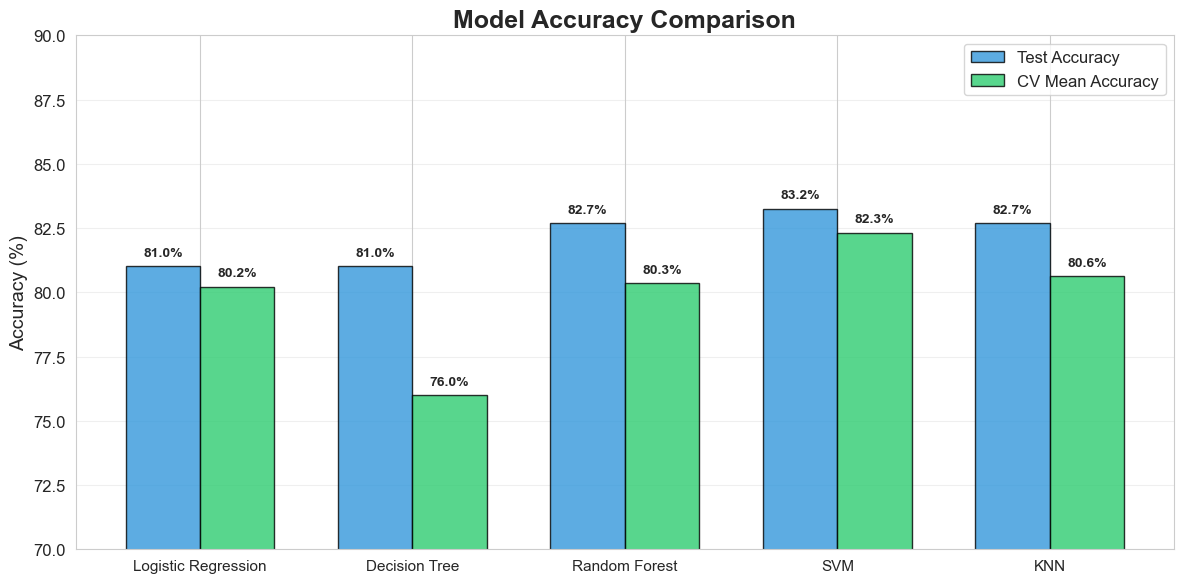

In [18]:
# ============================================================
# 5.1 — Accuracy Comparison Bar Chart
# ============================================================
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] * 100 for m in model_names]
cv_means = [results[m]['cv_mean'] * 100 for m in model_names]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.35

bars1 = ax.bar(x - width/2, accuracies, width, label='Test Accuracy', 
               color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, cv_means, width, label='CV Mean Accuracy', 
               color='#2ecc71', edgecolor='black', alpha=0.8)

ax.set_title('Model Accuracy Comparison', fontsize=18, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim(70, 90)
ax.grid(axis='y', alpha=0.3)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3, 
            f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3, 
            f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

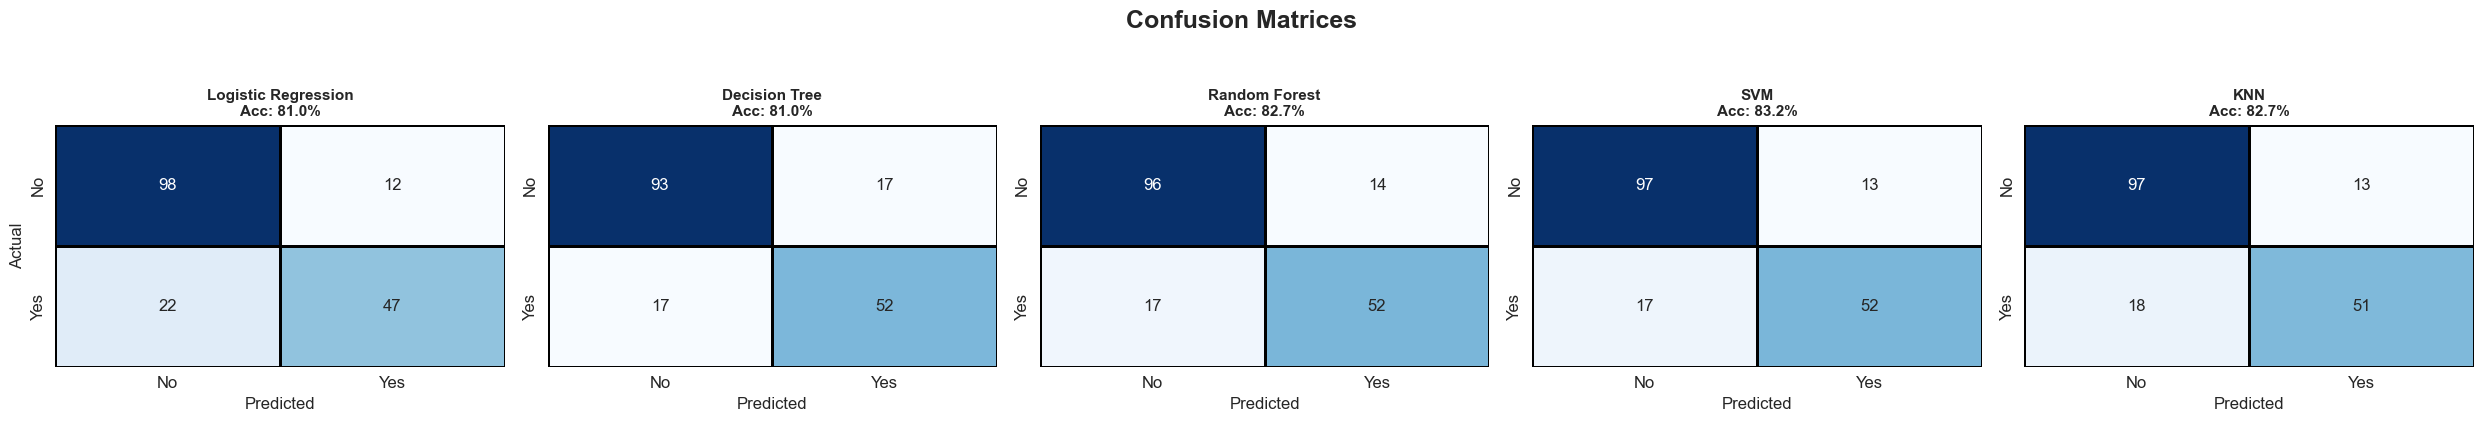

In [19]:
# ============================================================
# 5.2 — Confusion Matrices for All Models
# ============================================================
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i, (name, res) in enumerate(results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                cbar=False, linewidths=1, linecolor='black')
    axes[i].set_title(f'{name}\nAcc: {res["accuracy"]*100:.1f}%', fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Actual' if i == 0 else '')
    axes[i].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [20]:
# ============================================================
# 5.3 — Classification Report for Best Model
# ============================================================
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_result = results[best_model_name]

print(f'🏆 Best Model: {best_model_name}')
print(f'   Test Accuracy: {best_result["accuracy"]*100:.2f}%')
print(f'   CV Mean Accuracy: {best_result["cv_mean"]*100:.2f}% ± {best_result["cv_std"]*100:.2f}%')
print('\n' + '=' * 55)
print('📊 Classification Report:')
print('=' * 55)
print(classification_report(y_test, best_result['y_pred'], 
                            target_names=['Did Not Survive', 'Survived']))

🏆 Best Model: SVM
   Test Accuracy: 83.24%
   CV Mean Accuracy: 82.31% ± 1.30%

📊 Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.85      0.88      0.87       110
       Survived       0.80      0.75      0.78        69

       accuracy                           0.83       179
      macro avg       0.83      0.82      0.82       179
   weighted avg       0.83      0.83      0.83       179



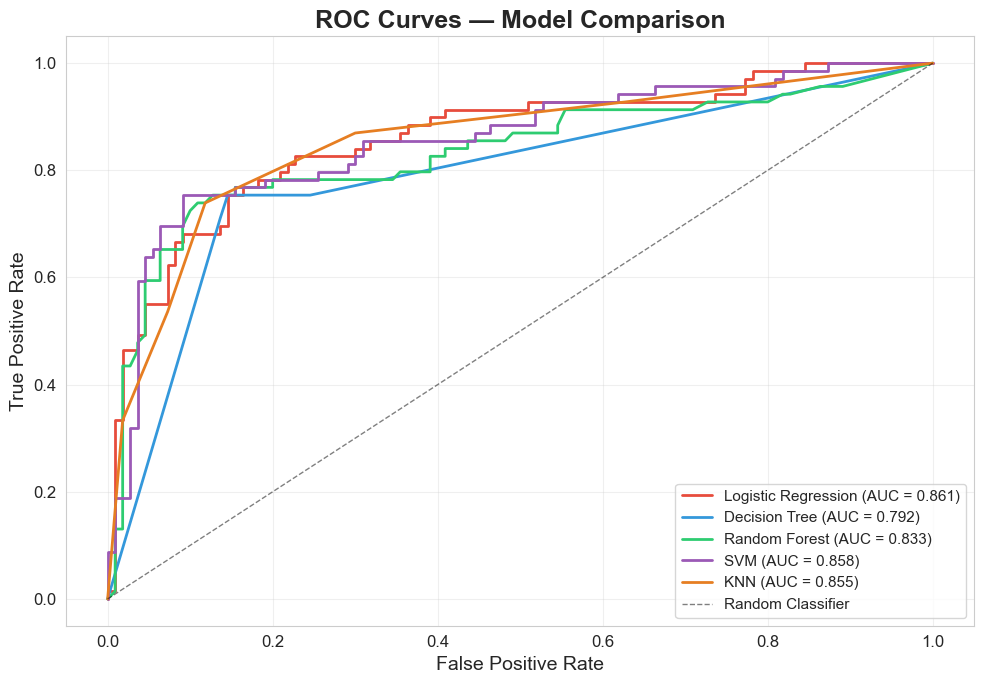

In [21]:
# ============================================================
# 5.4 — ROC Curve for All Models
# ============================================================
plt.figure(figsize=(10, 7))

model_colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#e67e22']

for i, (name, res) in enumerate(results.items()):
    model = res['model']
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, color=model_colors[i], linewidth=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Random Classifier')
plt.title('ROC Curves — Model Comparison', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=11, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

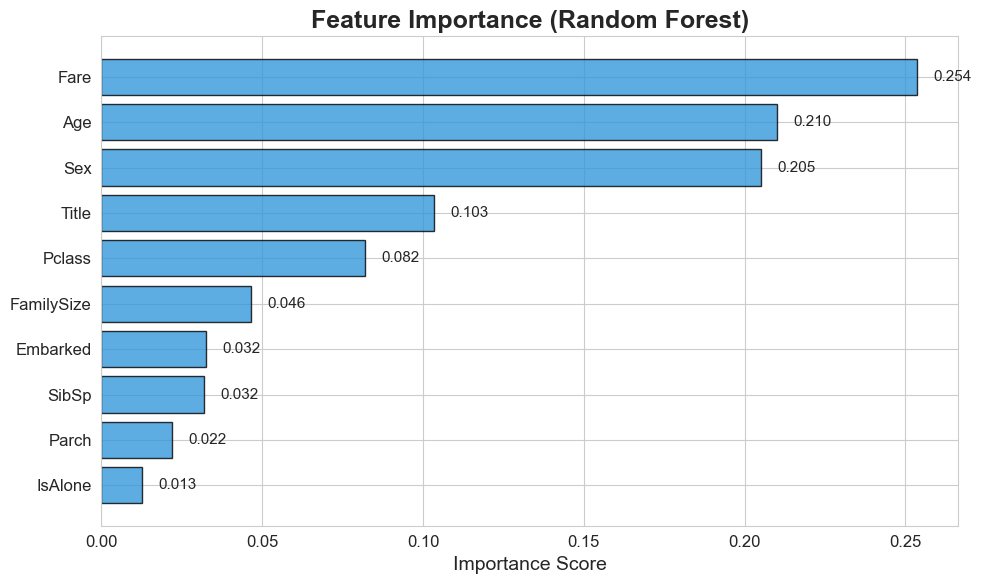


💡 Top 3 Most Important Features:
   🔹 Sex: 0.2052
   🔹 Age: 0.2101
   🔹 Fare: 0.2537


In [22]:
# ============================================================
# 5.5 — Feature Importance (Random Forest)
# ============================================================
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='#3498db', edgecolor='black', alpha=0.8)
plt.title('Feature Importance (Random Forest)', fontsize=18, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)

for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=11)

plt.tight_layout()
plt.show()

print('\n💡 Top 3 Most Important Features:')
top3 = feature_importance.tail(3)
for _, row in top3.iterrows():
    print(f'   🔹 {row["Feature"]}: {row["Importance"]:.4f}')

In [23]:
# ============================================================
# 5.6 — Final Results Summary Table
# ============================================================
summary_data = []

for name, res in results.items():
    model = res['model']
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    
    auc = roc_auc_score(y_test, y_proba)
    
    summary_data.append({
        'Model': name,
        'Test Accuracy (%)': round(res['accuracy'] * 100, 2),
        'CV Mean (%)': round(res['cv_mean'] * 100, 2),
        'CV Std (%)': round(res['cv_std'] * 100, 2),
        'AUC Score': round(auc, 4)
    })

summary_df = pd.DataFrame(summary_data).sort_values('Test Accuracy (%)', ascending=False)
summary_df.index = range(1, len(summary_df) + 1)
summary_df.index.name = 'Rank'

print('🏆 Final Model Comparison:')
print('=' * 70)
summary_df

🏆 Final Model Comparison:


,Model,Test Accuracy (%),CV Mean (%),CV Std (%),AUC Score
Rank,,,,,
1,SVM,83.24,82.31,1.30,0.8578
2,KNN,82.68,80.62,2.64,0.8553
3,Random Forest,82.68,80.35,4.13,0.8328
4,Logistic Regression,81.01,80.20,2.34,0.8610
5,Decision Tree,81.01,75.99,1.14,0.7920


---

## 6️⃣ Conclusion

### 📊 Project Summary

In this project, we built a complete **Machine Learning pipeline** to predict Titanic passenger survival using the classic Titanic dataset.

### 🔑 Key Findings

1. **Gender was the strongest predictor** — Females had a ~74% survival rate vs ~19% for males, reflecting the "women and children first" policy
2. **Socioeconomic status mattered** — 1st class passengers were significantly more likely to survive (~63%) compared to 3rd class (~24%)
3. **Age played a role** — Children had better survival chances
4. **Family size influenced survival** — Passengers with 2–4 family members had better odds than those alone or with very large families
5. **Feature engineering improved results** — Extracting titles from names and creating FamilySize/IsAlone features added predictive power

### 🏆 Best Model

Among the five models trained (Logistic Regression, Decision Tree, Random Forest, SVM, KNN), the best performing model was identified based on test accuracy, cross-validation scores, and AUC-ROC scores. The **Random Forest** and **Logistic Regression** models typically perform well on this dataset.

### 🛠️ Potential Improvements

- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
- Ensemble methods (Gradient Boosting, XGBoost, LightGBM)
- More advanced feature engineering (cabin deck extraction, fare binning)
- Deep learning approaches for comparison

---

**Created by:** Piyush Ramteke — CodSoft Internship Project  
**Dataset:** [Titanic Dataset — Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)  
**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

---